In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
sb.set()

In [2]:
loanData = pd.read_csv('loan.csv')
loanData.head()

/var/folders/cl/7wq1rc6d6f36t3gtblx15g1m0000gn/T/ipykernel_99040/3207021688.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanData = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loandata_cleaned = loanData.dropna(axis=1)
loandata_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [4]:
loandata_cleanedfinal = pd.DataFrame(loanData[['loan_amnt','int_rate','annual_inc','home_ownership','dti','emp_length','grade','loan_status','inq_last_6mths','open_acc','term','verification_status','delinq_2yrs']]) 
loandata_cleanedfinal.head()

,loan_amnt,int_rate,annual_inc,home_ownership,dti,emp_length,grade,loan_status,inq_last_6mths,open_acc,term,verification_status,delinq_2yrs
0,5000,10.65%,24000.0,RENT,27.65,10+ years,B,Fully Paid,1,3,36 months,Verified,0
1,2500,15.27%,30000.0,RENT,1.00,< 1 year,C,Charged Off,5,3,60 months,Source Verified,0
2,2400,15.96%,12252.0,RENT,8.72,10+ years,C,Fully Paid,2,2,36 months,Not Verified,0
3,10000,13.49%,49200.0,RENT,20.00,10+ years,C,Fully Paid,1,10,36 months,Source Verified,0
4,3000,12.69%,80000.0,RENT,17.94,1 year,B,Current,0,15,60 months,Source Verified,0


In [5]:
# Remove the percentage sign from int_rate column
loandata_cleanedfinal['int_rate'] = loandata_cleanedfinal['int_rate'].str.replace('%', '')

# Convert the int_rate column to float
loandata_cleanedfinal['int_rate'] = loandata_cleanedfinal['int_rate'].astype(float)

# Now int_rate column will be of float type without the percentage sign

#### Removed percentage sign from int_rate column so that it will be a float type and not str.

In [6]:
loandata_numeric = loandata_cleanedfinal.apply(pd.to_numeric, errors='coerce')

# Remove columns with NaN values
loandata_numeric_cleaned = loandata_numeric.dropna(axis=1)
loandata_numeric_cleaned.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,delinq_2yrs
0,5000,10.65,24000.0,27.65,1,3,0
1,2500,15.27,30000.0,1.00,5,3,0
2,2400,15.96,12252.0,8.72,2,2,0
3,10000,13.49,49200.0,20.00,1,10,0
4,3000,12.69,80000.0,17.94,0,15,0


In [7]:
def remove_outliers(loandata_numeric_cleaned):
    Q1 = loandata_numeric_cleaned.quantile(0.25)
    Q3 = loandata_numeric_cleaned.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return loandata_numeric_cleaned[((loandata_numeric_cleaned >= lower_bound) & (loandata_numeric_cleaned <= upper_bound)).all(axis=1)]

# Apply remove_outliers function to the entire DataFrame
loandata_numeric_cleaned_cleaned = remove_outliers(loandata_numeric_cleaned)

#### Outliers are removed.

In [8]:
column_means = loandata_numeric_cleaned.mean()
loandata_numeric_filled = loandata_numeric_cleaned.fillna(column_means)
loandata_numeric_cleaned.describe()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,delinq_2yrs
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,12.021177,6.896893e+04,13.315130,0.869200,9.294408,0.146512
std,7456.670694,3.724825,6.379377e+04,6.678594,1.070219,4.400282,0.491812
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,9.250000,4.040400e+04,8.170000,0.000000,6.000000,0.000000
50%,10000.000000,11.860000,5.900000e+04,13.400000,1.000000,9.000000,0.000000
75%,15000.000000,14.590000,8.230000e+04,18.600000,1.000000,12.000000,0.000000
max,35000.000000,24.590000,6.000000e+06,29.990000,8.000000,44.000000,11.000000


In [9]:
merged_data = pd.concat([loandata_numeric_cleaned, loandata_cleanedfinal], axis=1)

In [10]:
merged_data.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,delinq_2yrs,loan_amnt,int_rate,annual_inc,home_ownership,dti,emp_length,grade,loan_status,inq_last_6mths,open_acc,term,verification_status,delinq_2yrs
0,5000,10.65,24000.0,27.65,1,3,0,5000,10.65,24000.0,RENT,27.65,10+ years,B,Fully Paid,1,3,36 months,Verified,0
1,2500,15.27,30000.0,1.00,5,3,0,2500,15.27,30000.0,RENT,1.00,< 1 year,C,Charged Off,5,3,60 months,Source Verified,0
2,2400,15.96,12252.0,8.72,2,2,0,2400,15.96,12252.0,RENT,8.72,10+ years,C,Fully Paid,2,2,36 months,Not Verified,0
3,10000,13.49,49200.0,20.00,1,10,0,10000,13.49,49200.0,RENT,20.00,10+ years,C,Fully Paid,1,10,36 months,Source Verified,0
4,3000,12.69,80000.0,17.94,0,15,0,3000,12.69,80000.0,RENT,17.94,1 year,B,Current,0,15,60 months,Source Verified,0


In [11]:
merged_data_cleaned = merged_data.loc[:,~merged_data.columns.duplicated()]
merged_data_cleaned = merged_data_cleaned[merged_data_cleaned['loan_status'] != 'Current']
merged_data_cleaned.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,delinq_2yrs,home_ownership,emp_length,grade,loan_status,term,verification_status
0,5000,10.65,24000.0,27.65,1,3,0,RENT,10+ years,B,Fully Paid,36 months,Verified
1,2500,15.27,30000.0,1.00,5,3,0,RENT,< 1 year,C,Charged Off,60 months,Source Verified
2,2400,15.96,12252.0,8.72,2,2,0,RENT,10+ years,C,Fully Paid,36 months,Not Verified
3,10000,13.49,49200.0,20.00,1,10,0,RENT,10+ years,C,Fully Paid,36 months,Source Verified
5,5000,7.90,36000.0,11.20,3,9,0,RENT,3 years,A,Fully Paid,36 months,Source Verified


#### The merged_data_cleaned now contain a DataFrame where duplicate columns have been removed and rows with 'Current' loan status have been excluded.

In [12]:
# Check for NaN/null values in the merged DataFrame
nan_values = merged_data_cleaned.isna().sum()

# Print columns with NaN/null values, if any
columns_with_nan = nan_values[nan_values > 0].index.tolist()
if len(columns_with_nan) > 0:
    print("Columns with NaN/null values:")
    print(columns_with_nan)
else:
    print("No NaN/null values found in any column.")

Columns with NaN/null values:
['emp_length']


In [13]:
# Fill missing values in the categorical column with the mode
merged_data_cleaned['emp_length'] = merged_data_cleaned['emp_length'].fillna(merged_data_cleaned['emp_length'].mode()[0])

In [14]:
# Check for NaN/null values in the merged DataFrame
nan_values = merged_data_cleaned.isna().sum()

# Print columns with NaN/null values, if any
columns_with_nan = nan_values[nan_values > 0].index.tolist()
if len(columns_with_nan) > 0:
    print("Columns with NaN/null values:")
    print(columns_with_nan)
else:
    print("No NaN/null values found in any column.")

No NaN/null values found in any column.


In [15]:
print(merged_data_cleaned.columns)


Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'delinq_2yrs', 'home_ownership', 'emp_length', 'grade',
       'loan_status', 'term', 'verification_status'],
      dtype='object')


In [16]:
print(merged_data_cleaned.dtypes)



loan_amnt                int64
int_rate               float64
annual_inc             float64
dti                    float64
inq_last_6mths           int64
open_acc                 int64
delinq_2yrs              int64
home_ownership          object
emp_length              object
grade                   object
loan_status             object
term                    object
verification_status     object
dtype: object


In [17]:
merged_data_cleaned.isnull().sum()

loan_amnt              0
int_rate               0
annual_inc             0
dti                    0
inq_last_6mths         0
open_acc               0
delinq_2yrs            0
home_ownership         0
emp_length             0
grade                  0
loan_status            0
term                   0
verification_status    0
dtype: int64

In [18]:
# Check for negative values in numerical columns only
numerical_columns = merged_data_cleaned.select_dtypes(include=['int', 'float']).columns
negative_values = (merged_data_cleaned[numerical_columns] < 0).any().any()

if negative_values:
    print("Negative values exist in the dataset.")
else:
    print("No negative values found in the dataset.")


No negative values found in the dataset.


In [19]:
# Convert loan_status to binary representation
merged_data_cleaned['loan_status_numeric'] = merged_data_cleaned['loan_status'].map({'Fully Paid': int('001', 2), 'Charged Off': int('010', 2)})

# Numerical columns
numerical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'delinq_2yrs']

# Calculate correlation coefficients
correlation_matrix = merged_data_cleaned[numerical_columns].corrwith(merged_data_cleaned['loan_status_numeric'])

# Remove duplicates from correlation matrix
correlation_matrix = correlation_matrix[~correlation_matrix.index.duplicated()]

# Sort correlation coefficients in descending order
top_numerical_columns = correlation_matrix.abs().sort_values(ascending=False)[:3]

print("Top 3 Numerical Columns:")
print(top_numerical_columns)

Top 3 Numerical Columns:
int_rate          0.211390
inq_last_6mths    0.071878
loan_amnt         0.059463
dtype: float64


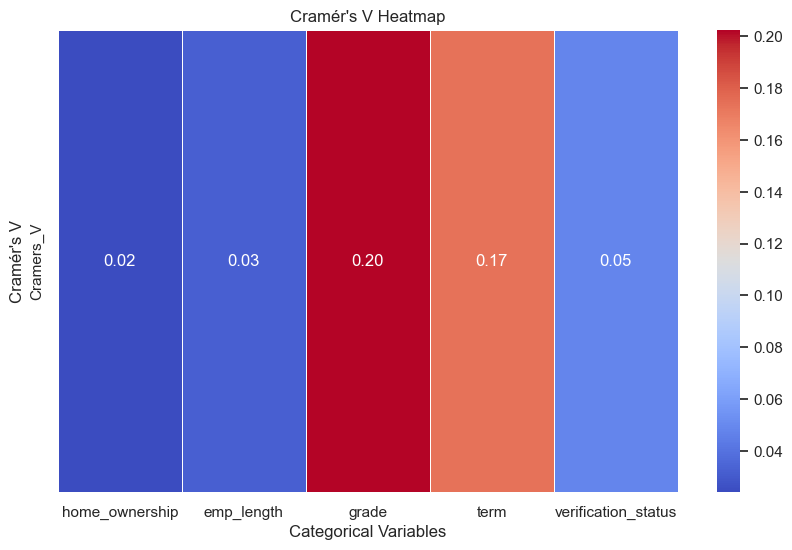

In [20]:
merged_data_cleaned['loan_status_binary'] = merged_data_cleaned['loan_status'].map({'Fully Paid': int('001', 2), 'Charged Off': int('010', 2)})
categorical_columns = ['home_ownership', 'emp_length', 'grade', 'term', 'verification_status']

# Calculate Cramér's V for each categorical variable
cramers_v = []
for col in categorical_columns:
    contingency_table = pd.crosstab(merged_data_cleaned[col], merged_data_cleaned['loan_status_binary'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v.append(np.sqrt(chi2 / (n * min_dim)))

# Create a DataFrame to store Cramér's V values
cramers_v_df = pd.DataFrame({'Cramers_V': cramers_v}, index=categorical_columns)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_df.transpose(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Heatmap")
plt.xlabel("Categorical Variables")
plt.ylabel("Cramér's V")
plt.show()

#### Cramér's V is a measure of association between two categorical variables. It's derived from the chi-square statistic and ranges from 0 to 1, with higher values indicating a stronger association between the variables. Thus, top 3 variable with the highest association are grade,term and verification status.

In [21]:
binary_encoded_data = pd.get_dummies(merged_data_cleaned[['term', 'grade', 'verification_status']])

# Perform chi-square test for independence for each top categorical column against loan_status
chi2_results = {}
for column in binary_encoded_data.columns:
    contingency_table = pd.crosstab(binary_encoded_data[column], merged_data_cleaned['loan_status_numeric'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = (chi2, p)

# Display results of chi-square tests
for column, (chi2, p) in chi2_results.items():
    print(f"Chi-square test for {column} vs. loan_status:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

Chi-square test for term_ 36 months vs. loan_status:
Chi-square statistic: 1159.9348526526892
P-value: 3.1095440690986406e-254
Chi-square test for term_ 60 months vs. loan_status:
Chi-square statistic: 1159.9348526526892
P-value: 3.1095440690986406e-254
Chi-square test for grade_A vs. loan_status:
Chi-square statistic: 804.0731080973399
P-value: 7.022583260169745e-177
Chi-square test for grade_B vs. loan_status:
Chi-square statistic: 75.89679718313872
P-value: 2.988844535833386e-18
Chi-square test for grade_C vs. loan_status:
Chi-square statistic: 53.39907875737829
P-value: 2.7222448535361206e-13
Chi-square test for grade_D vs. loan_status:
Chi-square statistic: 256.73823232788146
P-value: 8.821055822736695e-58
Chi-square test for grade_E vs. loan_status:
Chi-square statistic: 344.20993665954865
P-value: 7.72747532970793e-77
Chi-square test for grade_F vs. loan_status:
Chi-square statistic: 261.7599123452921
P-value: 7.094179254792743e-59
Chi-square test for grade_G vs. loan_status:
Ch

A higher chi-square statistic indicates a larger discrepancy between the observed and expected frequencies, suggesting a stronger association between the variables.

Some p-values in the output are very small (e.g., 3.1095440690986406e-254), indicating that the observed associations are highly unlikely to be due to chance alone, and thus, the associations are considered statistically significant. (eg. term_ 36 month).

A combination of a high chi-sqaure stastic and low p-value gives stronger association between variables. (eg. term_ 36 months and term_ 60 months)

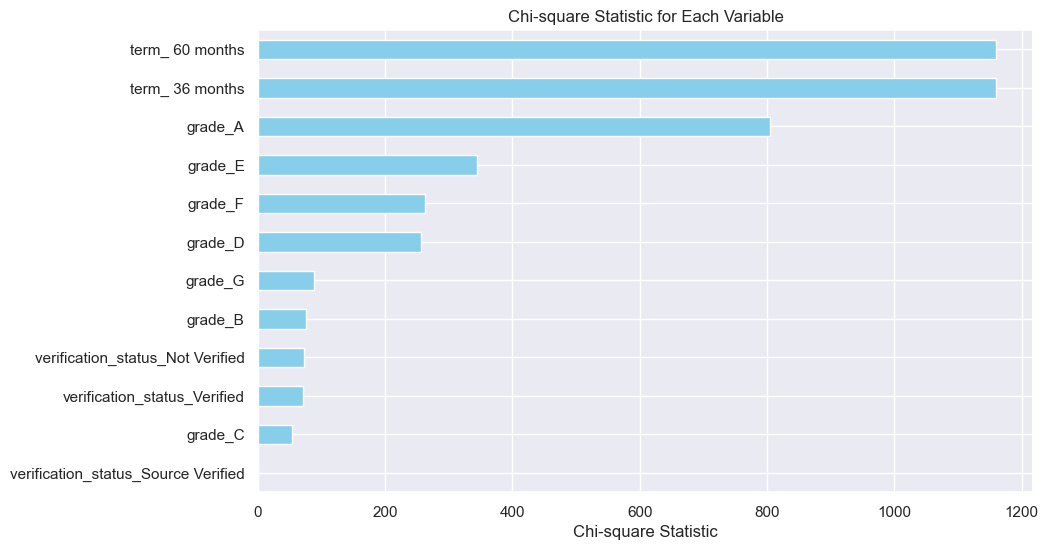

In [22]:
# Convert the dictionary to a DataFrame
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['Chi-square Statistic', 'P-value'])

# Plot
plt.figure(figsize=(10, 6))
chi2_df.sort_values(by='Chi-square Statistic')['Chi-square Statistic'].plot(kind='barh', color='skyblue')
plt.xlabel('Chi-square Statistic')
plt.title('Chi-square Statistic for Each Variable')
plt.show()

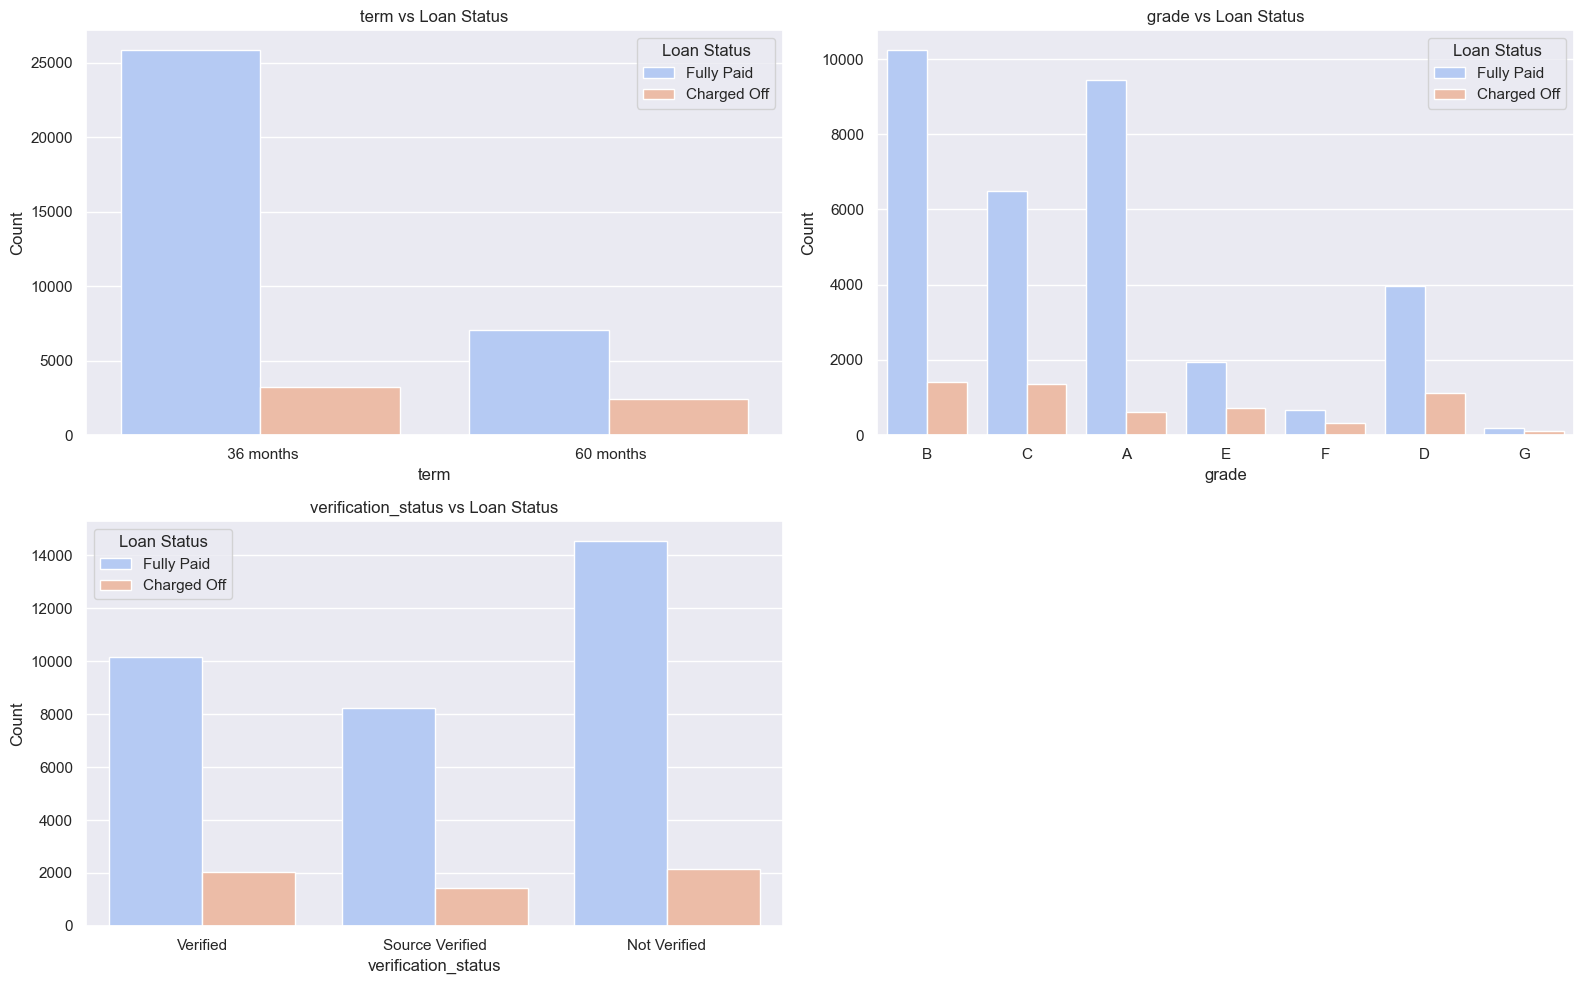

In [23]:
plt.figure(figsize=(16, 10))

# Define your categorical variables and their corresponding categories
categorical_variables = ['term', 'grade', 'verification_status']

# Loop through each categorical variable
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=variable, hue='loan_status', data=merged_data_cleaned, palette='coolwarm')
    plt.title(f'{variable} vs Loan Status')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

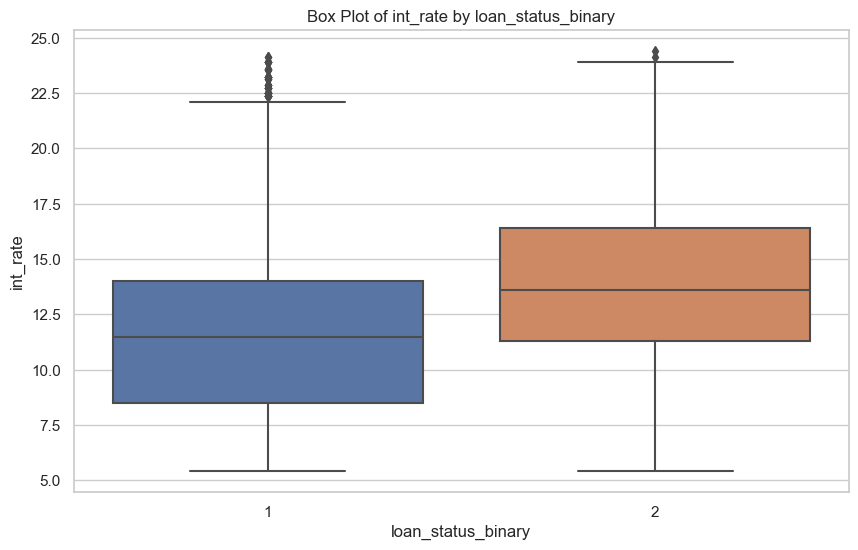

In [24]:
sns.set(style="whitegrid")

# Plot box plot for int_rate grouped by loan_status_binary
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_binary', y='int_rate', data=merged_data_cleaned)
plt.title('Box Plot of int_rate by loan_status_binary')
plt.xlabel('loan_status_binary')
plt.ylabel('int_rate')
plt.show()


#### The median interest rate for charged off loans is higher than the median interest rate for fully paid off loans in a box plot, it indicates a potential association between higher interest rates and loan default.

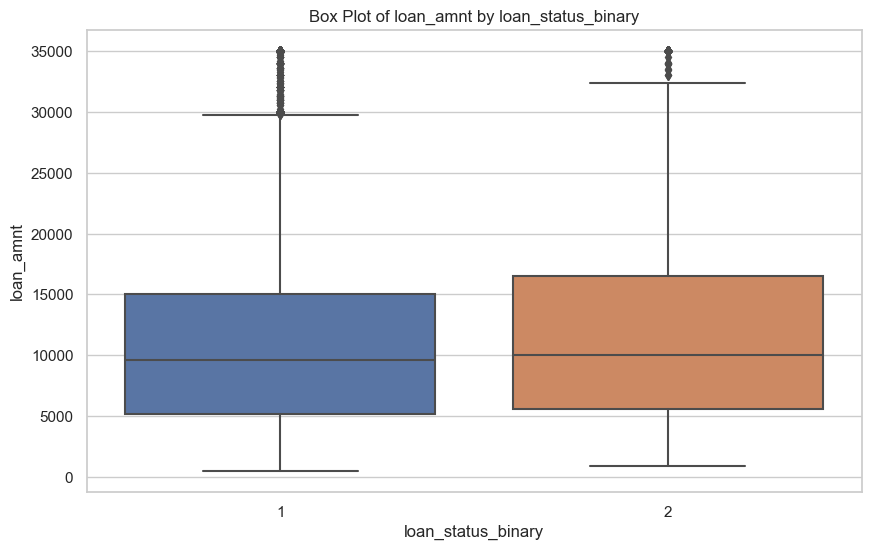

In [25]:
sns.set(style="whitegrid")

# Plot box plot for int_rate grouped by loan_status_binary
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_binary', y='loan_amnt', data=merged_data_cleaned)
plt.title('Box Plot of loan_amnt by loan_status_binary')
plt.xlabel('loan_status_binary')
plt.ylabel('loan_amnt')
plt.show()

#### Similar median values indicate that loan amount is not strong predictors for determining whether a person will default a loan.

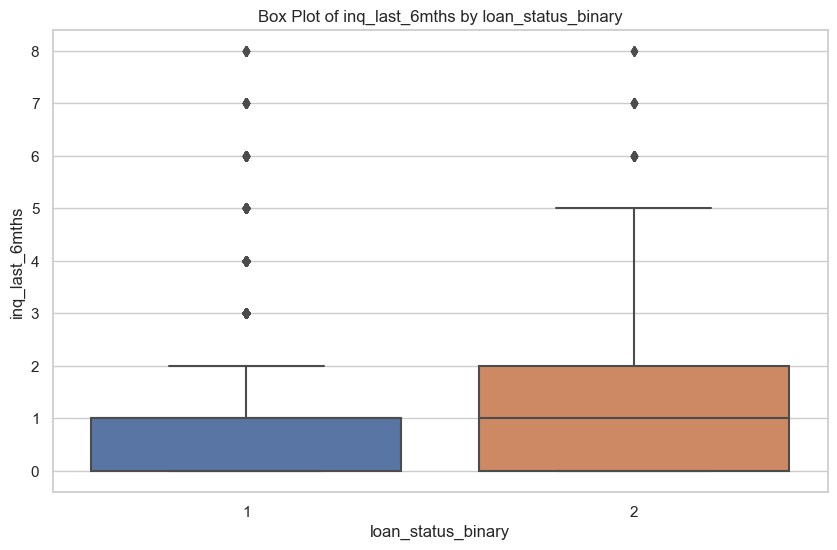

In [26]:
sns.set(style="whitegrid")

# Plot box plot for int_rate grouped by loan_status_binary
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_binary', y='inq_last_6mths', data=merged_data_cleaned)
plt.title('Box Plot of inq_last_6mths by loan_status_binary')
plt.xlabel('loan_status_binary')
plt.ylabel('inq_last_6mths')
plt.show()

The boxplot indicates that borrowers who defaulted on their loans (charged_off) typically show a median of 1 inquiry in the last 6 months, contrasting with borrowers who fully paid their loans, where the median is 0 inquiries. This implies that higher recent inquiry activity is associated with a greater likelihood of defaulting on loans, while lower or no recent inquiry activity is linked to a higher probability of fully paying off loans

### Preprocessing Categorical & Numeric data for ML Model

1) Converts Categorical variables into one-hot encoded vectors
2) Concatenate Numeric variables together with the one-hot encoded categorical variables & stores it in merged_data_cleaned_cat_ohe dataframe
3) Handling missing values by filling up with the most frequent

In [27]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
merged_data_cleaned_cat = merged_data_cleaned[['term', 'grade', 'verification_status']]
ohe.fit(merged_data_cleaned_cat)
merged_data_cleaned_cat_ohe = pd.DataFrame(ohe.transform(merged_data_cleaned_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(merged_data_cleaned_cat.columns))

# Check the encoded variables
merged_data_cleaned_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   term_ 36 months                      38577 non-null  float64
 1   term_ 60 months                      38577 non-null  float64
 2   grade_A                              38577 non-null  float64
 3   grade_B                              38577 non-null  float64
 4   grade_C                              38577 non-null  float64
 5   grade_D                              38577 non-null  float64
 6   grade_E                              38577 non-null  float64
 7   grade_F                              38577 non-null  float64
 8   grade_G                              38577 non-null  float64
 9   verification_status_Not Verified     38577 non-null  float64
 10  verification_status_Source Verified  38577 non-null  float64
 11  verification_status_Verified

In [28]:
# Combining Numeric features with the OHE Categorical features
merged_data_cleaned_num = merged_data_cleaned[['int_rate','inq_last_6mths','loan_amnt']]
merged_data_cleaned_res = merged_data_cleaned['loan_status']
merged_data_cleaned_ohe = pd.concat([merged_data_cleaned_num, merged_data_cleaned_cat_ohe, merged_data_cleaned_res], 
                           sort = False, axis = 1).reindex(index=merged_data_cleaned_num.index)

# Check the final dataframe
merged_data_cleaned_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   int_rate                             38577 non-null  float64
 1   inq_last_6mths                       38577 non-null  float64
 2   loan_amnt                            38577 non-null  float64
 3   term_ 36 months                      37437 non-null  float64
 4   term_ 60 months                      37437 non-null  float64
 5   grade_A                              37437 non-null  float64
 6   grade_B                              37437 non-null  float64
 7   grade_C                              37437 non-null  float64
 8   grade_D                              37437 non-null  float64
 9   grade_E                              37437 non-null  float64
 10  grade_F                              37437 non-null  float64
 11  grade_G                          

In [29]:
columns_with_missing_values = ['term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
                               'grade_E', 'grade_F', 'grade_G', 'verification_status_Not Verified',
                               'verification_status_Source Verified', 'verification_status_Verified']

# Fill missing values with the most frequent category for each column
for column in columns_with_missing_values:
    most_frequent_category = merged_data_cleaned_ohe[column].mode()[0]  # Get the most frequent category
    merged_data_cleaned_ohe[column].fillna(most_frequent_category, inplace=True)  # Fill missing values with the mode

# Verify that missing values have been filled
print("Missing values filled with the most frequent category:")
print(merged_data_cleaned_ohe.isnull().sum())


Missing values filled with the most frequent category:
int_rate                               0
inq_last_6mths                         0
loan_amnt                              0
term_ 36 months                        0
term_ 60 months                        0
grade_A                                0
grade_B                                0
grade_C                                0
grade_D                                0
grade_E                                0
grade_F                                0
grade_G                                0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
loan_status                            0
dtype: int64


In [30]:
merged_data_cleaned_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   int_rate                             38577 non-null  float64
 1   inq_last_6mths                       38577 non-null  float64
 2   loan_amnt                            38577 non-null  float64
 3   term_ 36 months                      38577 non-null  float64
 4   term_ 60 months                      38577 non-null  float64
 5   grade_A                              38577 non-null  float64
 6   grade_B                              38577 non-null  float64
 7   grade_C                              38577 non-null  float64
 8   grade_D                              38577 non-null  float64
 9   grade_E                              38577 non-null  float64
 10  grade_F                              38577 non-null  float64
 11  grade_G                          

### ML Model : Decision Tree Classifier
x : Predictor Variable

y: Response Variable ('loan_status')

[Text(0.5, 0.9, 'int_rate <= 13.985\ngini = 0.249\nsamples = 27003\nvalue = [3942, 23061]\nclass = Charged Off'),
 Text(0.25, 0.7, 'int_rate <= 9.895\ngini = 0.194\nsamples = 19313\nvalue = [2097, 17216]\nclass = Charged Off'),
 Text(0.125, 0.5, 'int_rate <= 7.89\ngini = 0.12\nsamples = 7698\nvalue = [493, 7205]\nclass = Charged Off'),
 Text(0.0625, 0.3, 'inq_last_6mths <= 0.5\ngini = 0.099\nsamples = 5150\nvalue = [268, 4882]\nclass = Charged Off'),
 Text(0.03125, 0.1, 'gini = 0.079\nsamples = 3104\nvalue = [128, 2976]\nclass = Charged Off'),
 Text(0.09375, 0.1, 'gini = 0.127\nsamples = 2046\nvalue = [140, 1906]\nclass = Charged Off'),
 Text(0.1875, 0.3, 'inq_last_6mths <= 2.5\ngini = 0.161\nsamples = 2548\nvalue = [225, 2323]\nclass = Charged Off'),
 Text(0.15625, 0.1, 'gini = 0.151\nsamples = 2316\nvalue = [190, 2126]\nclass = Charged Off'),
 Text(0.21875, 0.1, 'gini = 0.256\nsamples = 232\nvalue = [35, 197]\nclass = Charged Off'),
 Text(0.375, 0.5, 'int_rate <= 11.485\ngini = 0.238

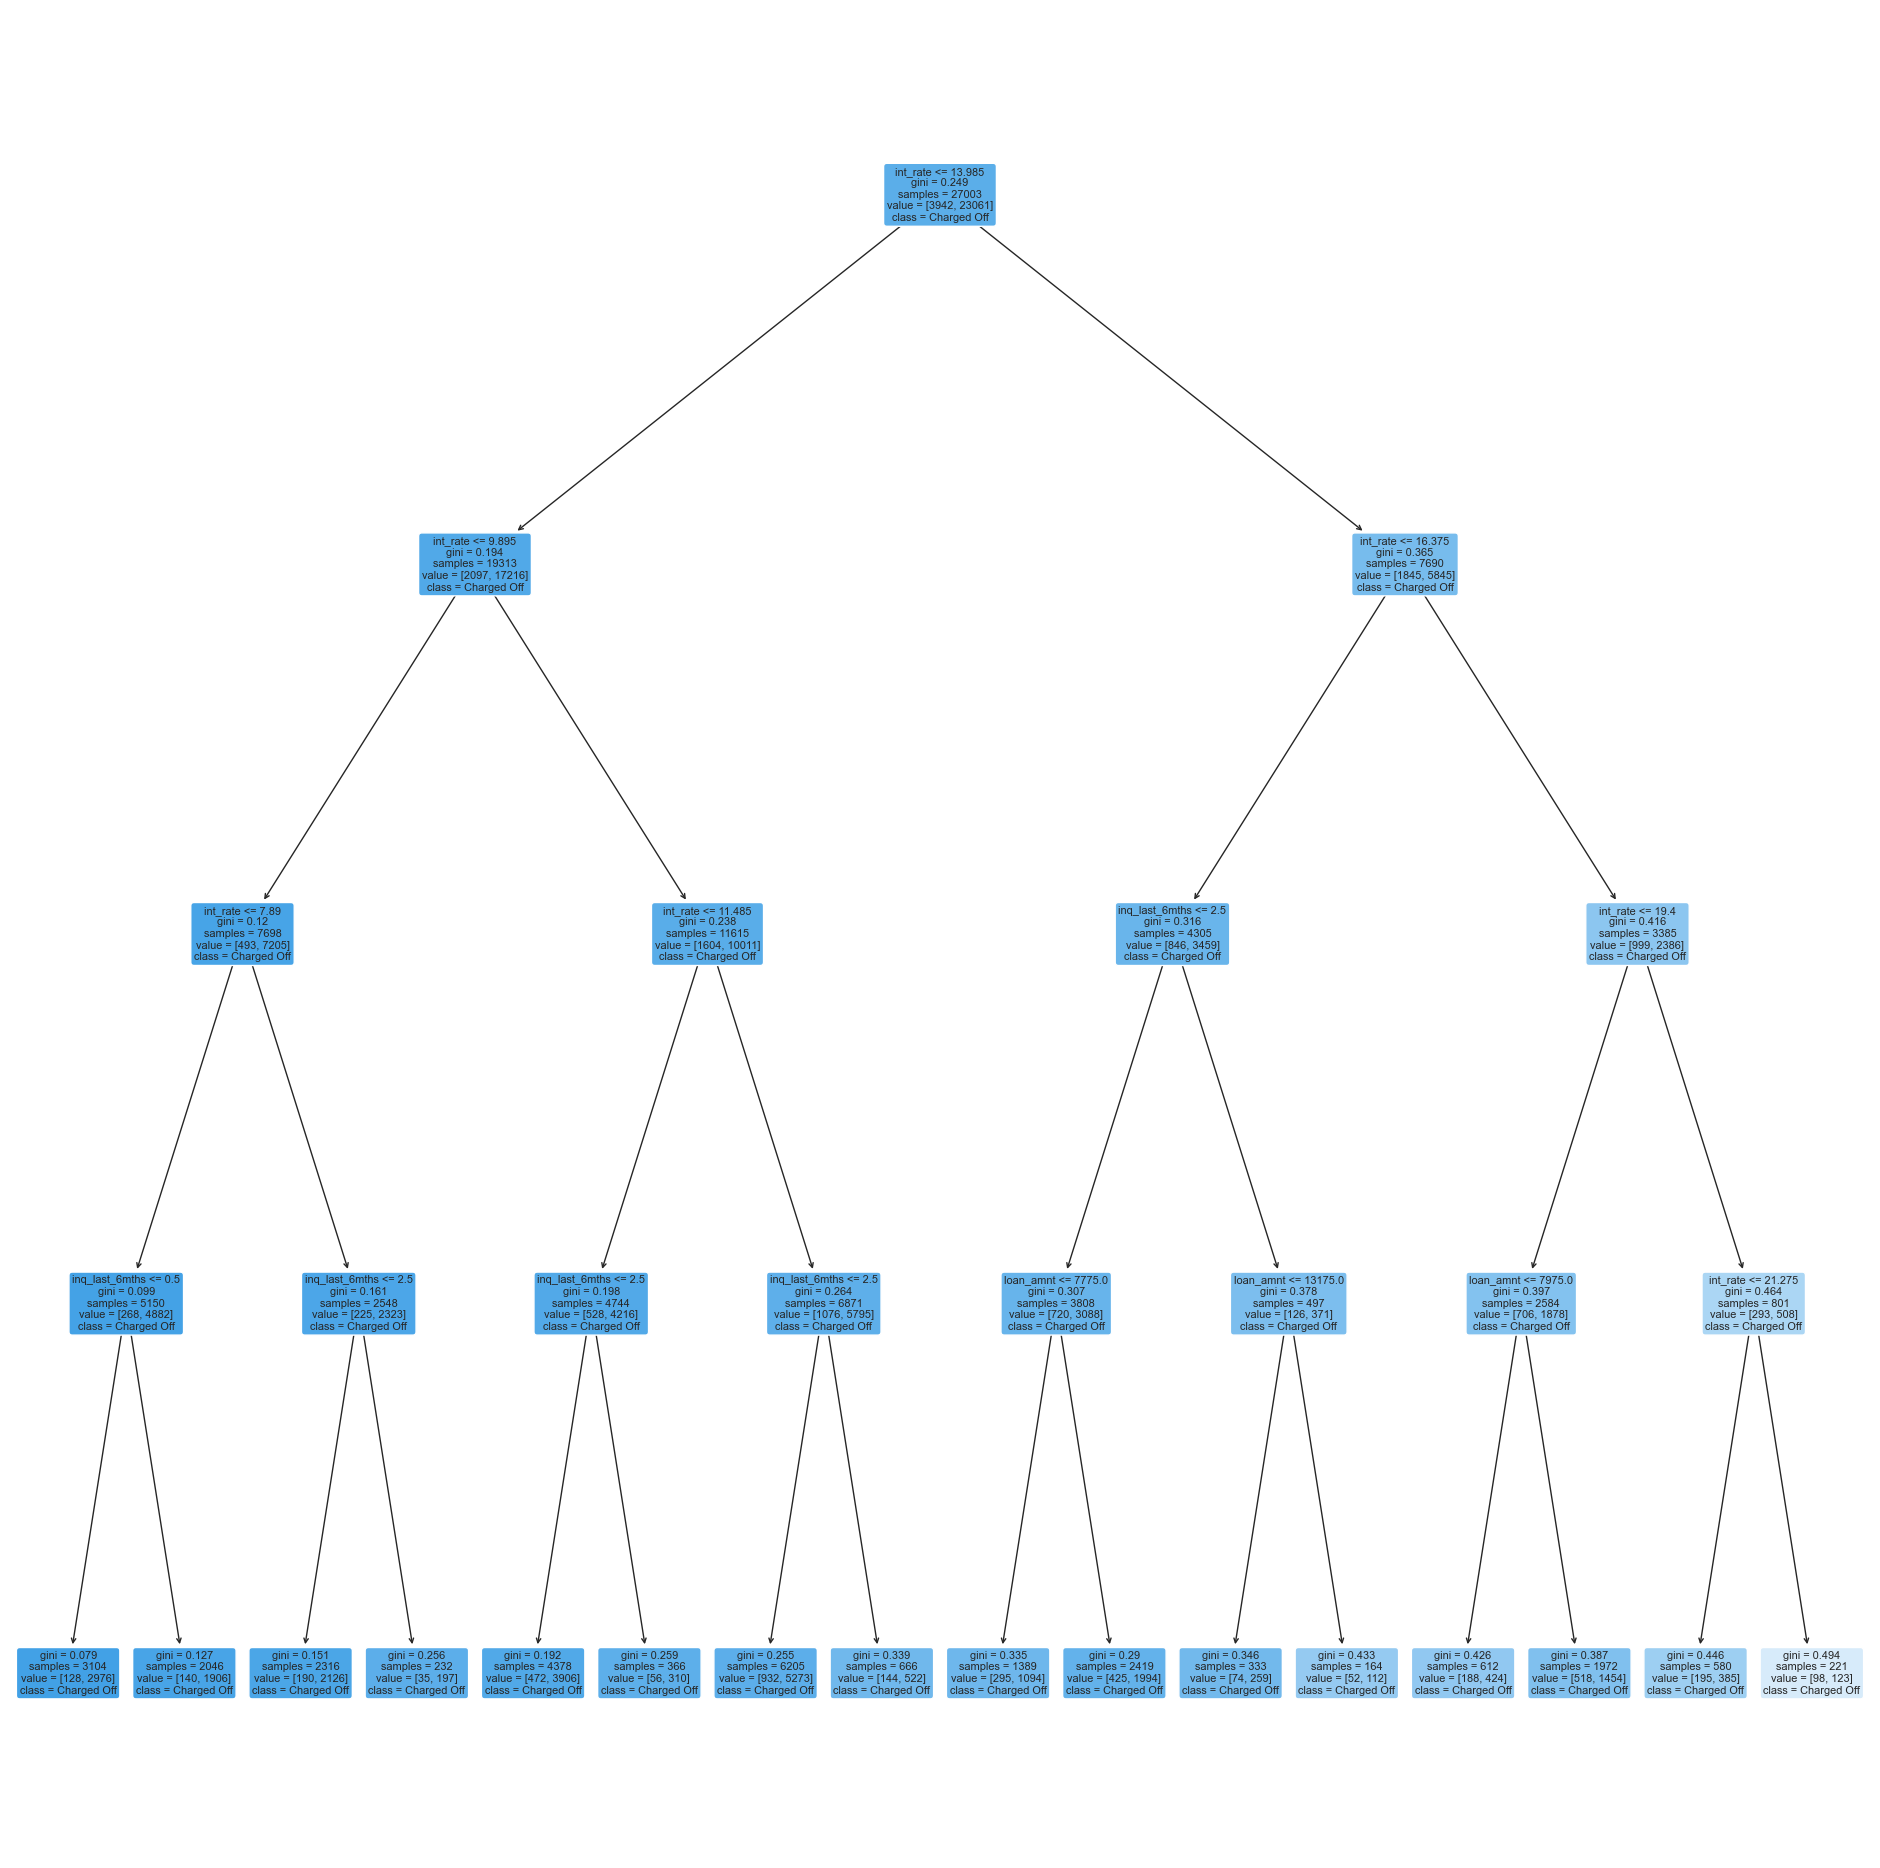

In [31]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["Fully Paid","Charged Off"])


Train Data
Accuracy  :	 0.8540162204199533

TPR Train :	 1.0
TNR Train :	 0.0

FPR Train :	 1.0
FNR Train :	 0.0


<Axes: >

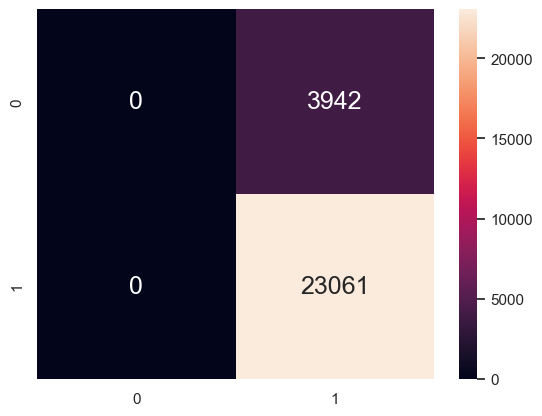

In [32]:
# Predict on the training set
y_train_pred = dectree.predict(X_train)

# Print the classification accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the accuracy measures from the confusion matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives: Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives: Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives: Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives: Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.8544150682564369

TPR Test :	 1.0
TNR Test :	 0.0

FPR Test :	 1.0
FNR Test :	 0.0


<Axes: >

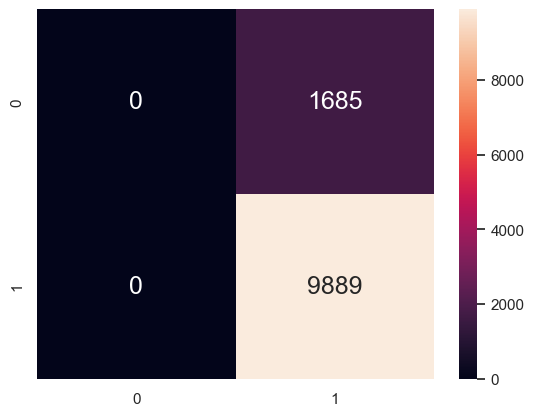

In [33]:
# Predict on the testing set
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]  # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (tnTest + fpTest)))
print("FNR Test :\t", (fnTest / (tpTest + fnTest)))

# Plot the two-way Confusion Matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


The classifier performs reasonably well on both training and testing datasets, with accuracy scores above 85%.The high TPR and low FNR indicate that the classifier effectively identifies positive instances (loan defaults).

However, the TNR is low, and the FPR is high, indicating that the classifier struggles to correctly identify negative instances (charged off loans).These results suggest that while the classifier performs well in identifying loan defaults, it has more difficulty accurately identifying charged off loans, leading to a higher rate of false positives and a lower true negative rate.

### Handling Imbalance of Data
From the Decision Tree Classifier, we can see that the model struggles with correctly identifying Fully paid loans, which may be attributed to the imbalance in the dataset. The imbalance of data can be inferrred from the extremely low TNR & extremely high FPR in both training & test data.

1) Filtering Fully Paid & Charged Off Classes & print to check for class imbalance
2) Upsampling to handle class imbalance

In [34]:
class_counts = merged_data_cleaned['loan_status_binary'].value_counts()

Fully_Paid_class = merged_data_cleaned[merged_data_cleaned['loan_status_binary'] == 1]
Charged_Off_class = merged_data_cleaned[merged_data_cleaned['loan_status_binary'] == 2]


print("Class Imbalance:")
print(class_counts)


Class Imbalance:
loan_status_binary
1    32950
2     5627
Name: count, dtype: int64


In [35]:
loanstatus_fullypaid = merged_data_cleaned_ohe[merged_data_cleaned_ohe.loan_status == 'Fully Paid']
loanstatus_chargedoff = merged_data_cleaned_ohe[merged_data_cleaned_ohe.loan_status == 'Charged Off']
 
# Upsample the Bad samples
loanstatus_chargedoff_up = resample(loanstatus_chargedoff, 
                        replace=True,                     # sample with replacement
                        n_samples=loanstatus_fullypaid.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
merged_data_cleaned_ohe_up = pd.concat([loanstatus_fullypaid, loanstatus_chargedoff_up])
 
# Check the ratio of the classes
merged_data_cleaned_ohe_up['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off    32950
Name: count, dtype: int64

#### The class imbalance issue, with 32950 instances of "Fully Paid" loans and 5627 instances of "Charged Off" loans,  is aimed to be mitigated by upsampling the minority class, potentially leading to better model performance, particularly for classifiers sensitive to class distribution. After upsampling, the number of instances for both classes becomes balanced, with 32950 instances each of "Fully Paid" and "Charged Off" loans, effectively addressing the class imbalance issue. 

In [36]:
merged_data_cleaned_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65900 entries, 0 to 26634
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   int_rate                             65900 non-null  float64
 1   inq_last_6mths                       65900 non-null  float64
 2   loan_amnt                            65900 non-null  float64
 3   term_ 36 months                      65900 non-null  float64
 4   term_ 60 months                      65900 non-null  float64
 5   grade_A                              65900 non-null  float64
 6   grade_B                              65900 non-null  float64
 7   grade_C                              65900 non-null  float64
 8   grade_D                              65900 non-null  float64
 9   grade_E                              65900 non-null  float64
 10  grade_F                              65900 non-null  float64
 11  grade_G                          

### Implementing Decision Tree Classifier (Upsampled Dataset)

[Text(0.5, 0.9, 'int_rate <= 11.18\ngini = 0.5\nsamples = 46130\nvalue = [23127, 23003]\nclass = Fully Paid'),
 Text(0.25, 0.7, 'int_rate <= 7.89\ngini = 0.449\nsamples = 16768\nvalue = [5697, 11071]\nclass = Charged Off'),
 Text(0.125, 0.5, 'inq_last_6mths <= 0.5\ngini = 0.363\nsamples = 6565\nvalue = [1567, 4998]\nclass = Charged Off'),
 Text(0.0625, 0.3, 'loan_amnt <= 8512.5\ngini = 0.322\nsamples = 3775\nvalue = [762, 3013]\nclass = Charged Off'),
 Text(0.03125, 0.1, 'gini = 0.358\nsamples = 2240\nvalue = [523, 1717]\nclass = Charged Off'),
 Text(0.09375, 0.1, 'gini = 0.263\nsamples = 1535\nvalue = [239, 1296]\nclass = Charged Off'),
 Text(0.1875, 0.3, 'int_rate <= 6.28\ngini = 0.411\nsamples = 2790\nvalue = [805, 1985]\nclass = Charged Off'),
 Text(0.15625, 0.1, 'gini = 0.332\nsamples = 561\nvalue = [118, 443]\nclass = Charged Off'),
 Text(0.21875, 0.1, 'gini = 0.426\nsamples = 2229\nvalue = [687, 1542]\nclass = Charged Off'),
 Text(0.375, 0.5, 'inq_last_6mths <= 2.5\ngini = 0.482

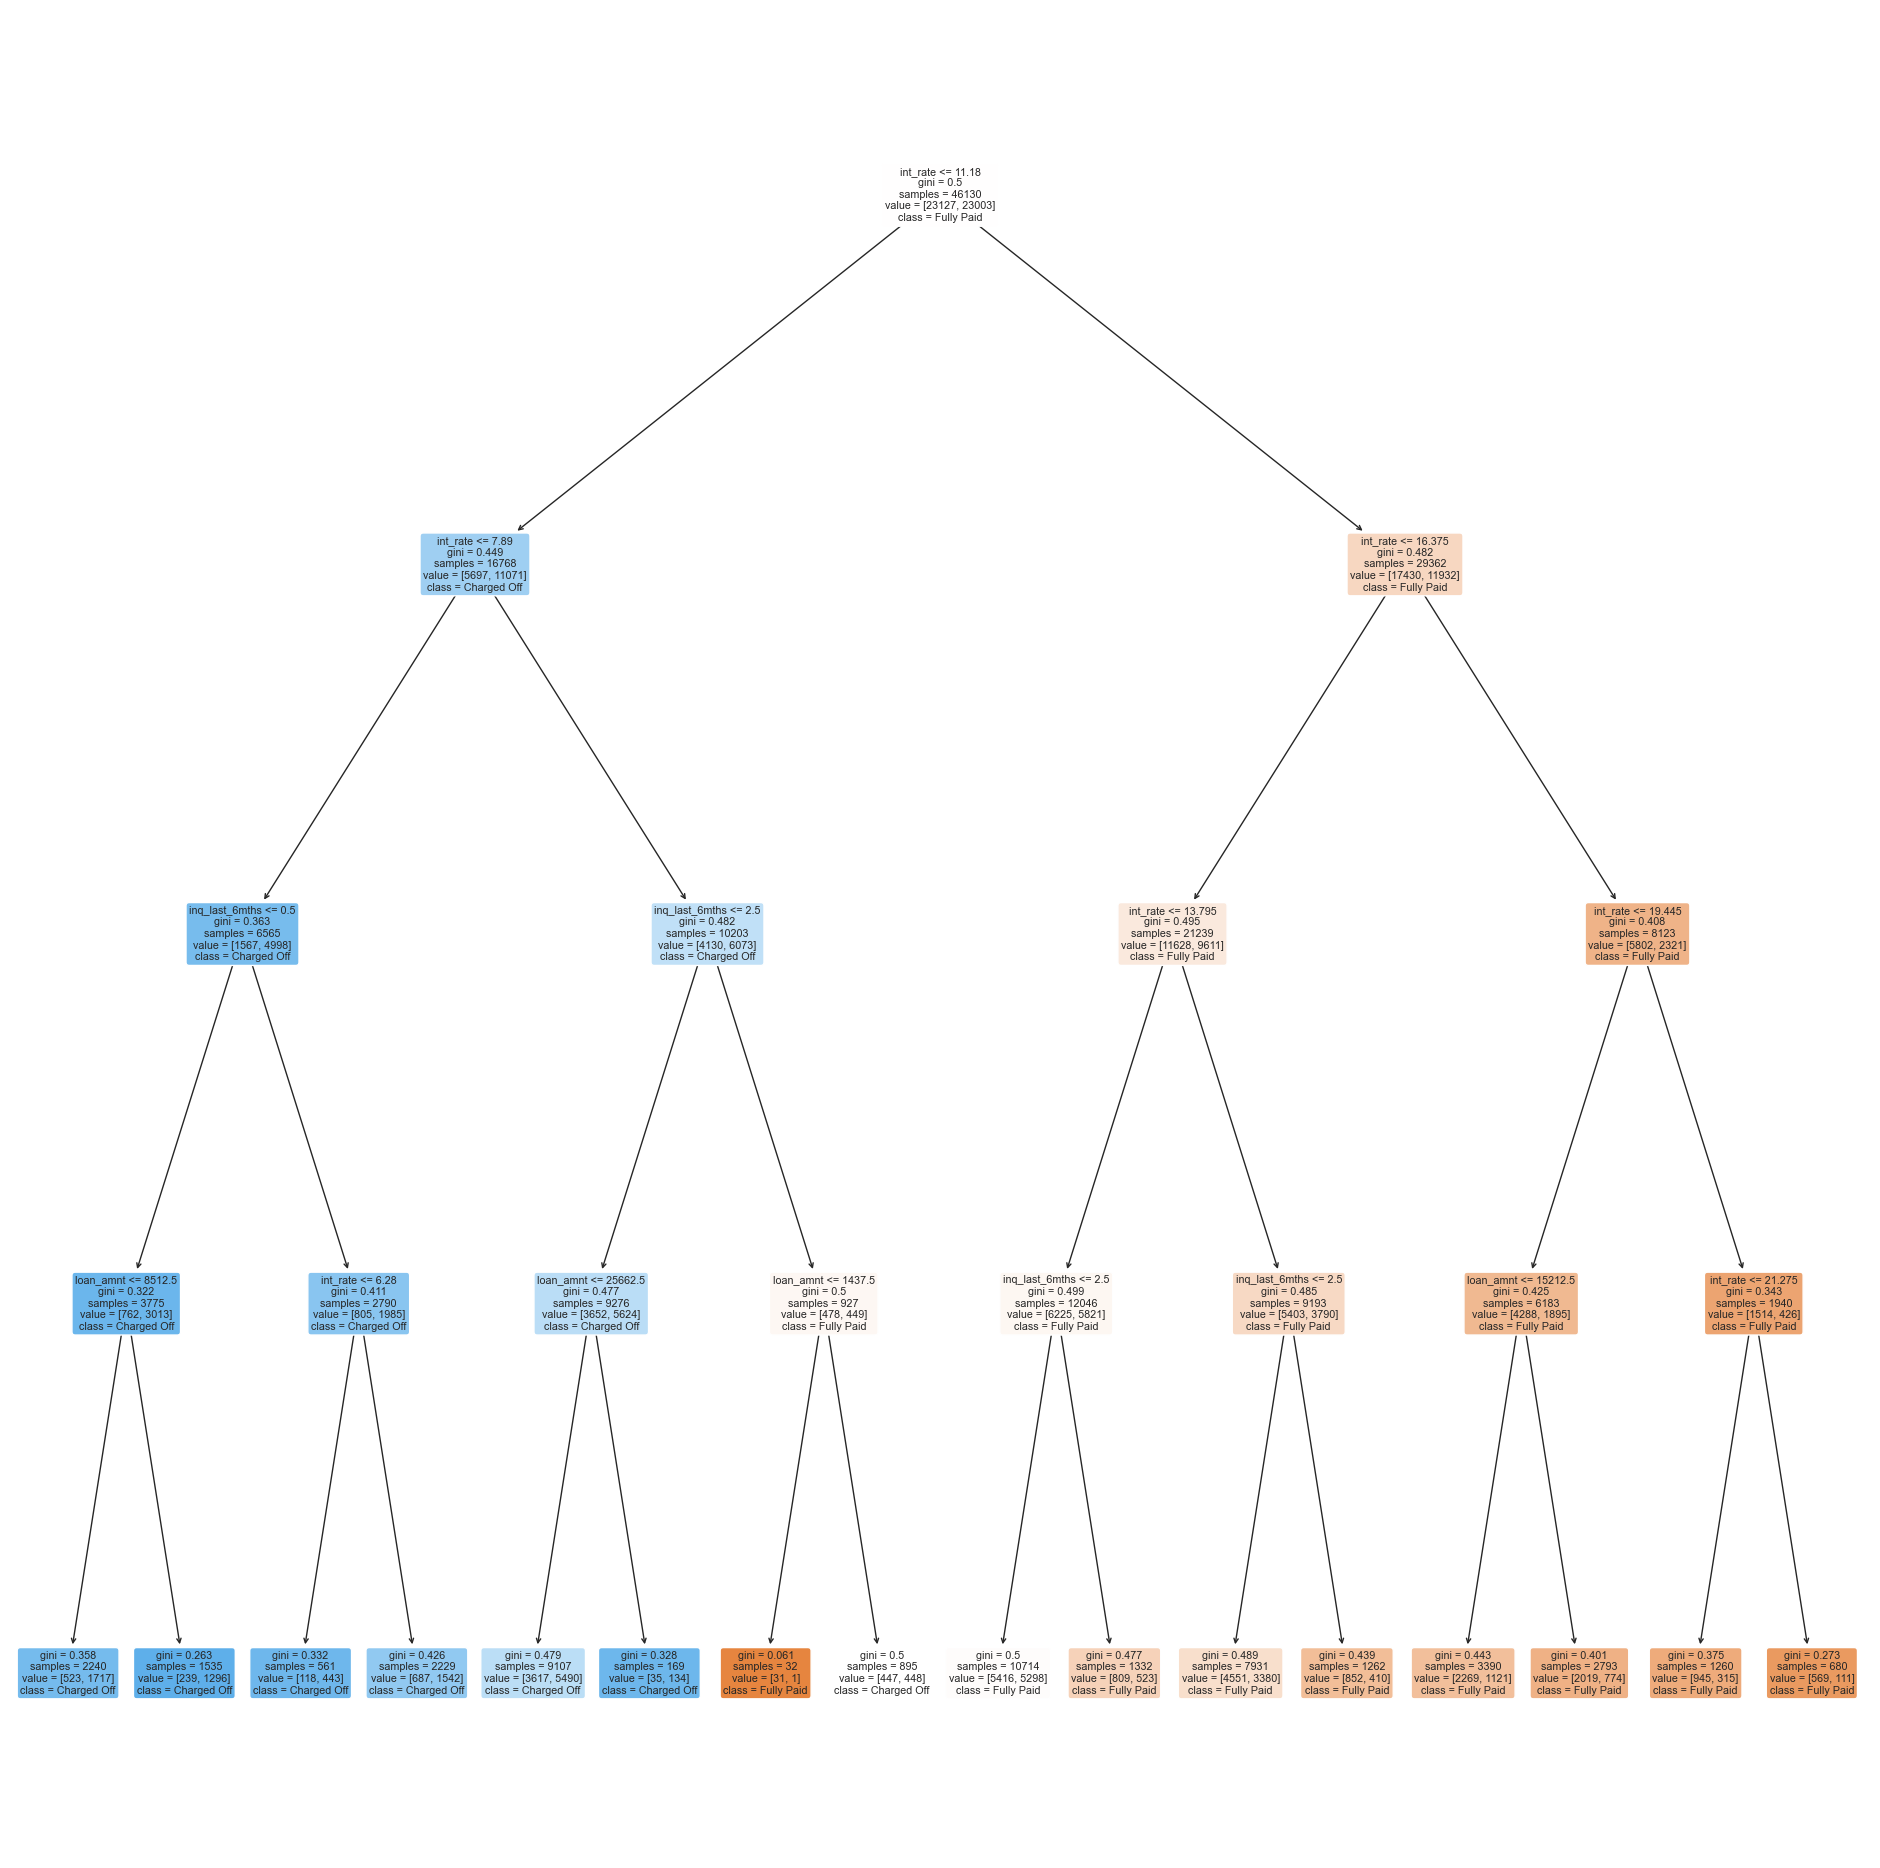

In [37]:
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["Fully Paid","Charged Off"])

Train Data
Accuracy  :	 0.6184912204639064

TPR Train :	 0.48124157718558447
TNR Train :	 0.7550049725429152

FPR Train :	 0.2449950274570848
FNR Train :	 0.5187584228144155


<Axes: >

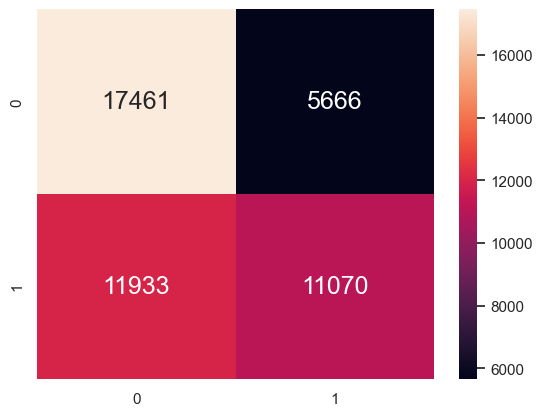

In [38]:
# Predict on the training set
y_train_pred = dectree.predict(X_train)

# Print the classification accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the accuracy measures from the confusion matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives: Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives: Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives: Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives: Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.613151239251391

TPR Test :	 0.47431386347642507
TNR Test :	 0.7537412195866843

FPR Test :	 0.2462587804133157
FNR Test :	 0.525686136523575


<Axes: >

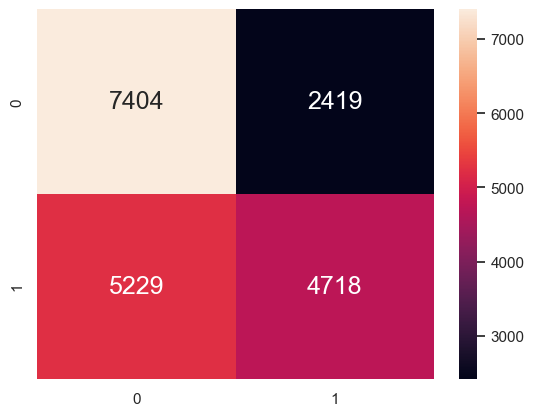

In [39]:
# Predict on the testing set
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]  # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (tnTest + fpTest)))
print("FNR Test :\t", (fnTest / (tpTest + fnTest)))

# Plot the two-way Confusion Matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


The Decision Tree Classifer on the upsampled dataset, exhibits decent accuracy, but it still struggles to balance the prediction of both classes effectively. It can be seen from the relatively low TNR, high FPR, and high FNR values.

Hence, further tuning of the model, through adjusting hyperparameters may be required to correctly identify Charged-Off loans.

### Hyperparameter Tuning 

1) Performing hyperparameter tuning for Decision Tree Classifer using Randomised Search Cross Validation (RandomizedSearchCV) 
2) Evaluate the performance on both training & testing datasets

In [40]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the Hyper-parameter Distribution to search on, in case of Decision Tree
param_dist = {'max_depth': randint(2, 11),}     # depth of trees between 2 and 10   

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(DecisionTreeClassifier(),   # the model family
                                   param_distributions=param_dist,  # the search distribution
                                   n_iter=10,            # number of random searches
                                   cv=5,                 # 5-fold cross-validation
                                   scoring='accuracy',   # score to evaluate
                                   random_state=42)      # random state for reproducibility

# Train the models using Cross-Validation
random_search.fit(X_train, y_train.loan_status.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(random_search.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(random_search.best_score_))


DecisionTreeClassifier(max_depth=9)
0.6383047908085844


In [41]:
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 9)  # change the max_depth to the optimal one based on the Random search
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=9)

After hyperparameter tuning, the best model found has a maximum depth of 9, and the corresponding cross-validated accuracy score is approximately 63%.

Train Data
Accuracy  :	 0.6615868198569261

TPR Train :	 0.6065588030619345
TNR Train :	 0.7162676117209785

FPR Train :	 0.28373238827902153
FNR Train :	 0.3934411969380654


<Axes: >

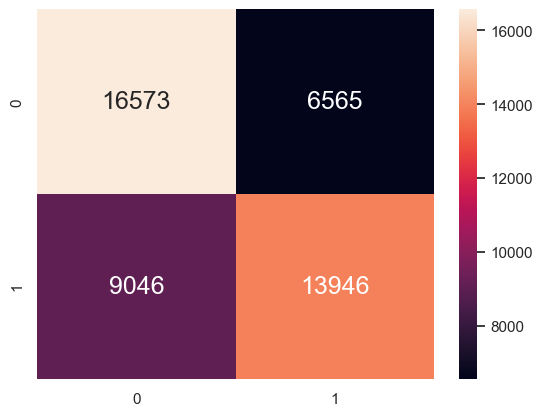

In [42]:
# Predict on the training set
y_train_pred = dectree.predict(X_train)

# Print the classification accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the accuracy measures from the confusion matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives: Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives: Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives: Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives: Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.6420839656044511

TPR Test :	 0.5845551315525206
TNR Test :	 0.7004688136975132

FPR Test :	 0.29953118630248676
FNR Test :	 0.4154448684474794


<Axes: >

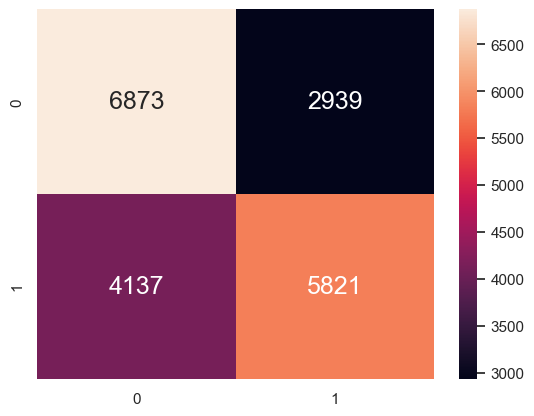

In [43]:
# Predict on the testing set
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy for test data
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for test data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]  # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (tnTest + fpTest)))
print("FNR Test :\t", (fnTest / (tpTest + fnTest)))

# Plot the two-way Confusion Matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", annot_kws={"size": 18})


The tuned Decision Tree Classifier shows improvement compared to the previous model, indicating that hyperparameter tuning has led to better performance. This is because the proportion of correctly predicting both "Fully Paid" and "Charged Off" loans has improved. 

### ML Model: Random Forest Classifier (100 Trees + 4 Depth)

x: Predictor Variable
y: Target/Response Variable ('loan_status')

1) Creating a Random Forest Classifier with 100 trees & a maximum depth of 4 for each tree
2) Training & testing of data using 'fit' method

In [44]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [45]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.loan_status.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.6200303490136571

TPR Train :	 0.4885797252199541
TNR Train :	 0.7515721906579347

FPR Train :	 0.24842780934206532
FNR Train :	 0.5114202747800459


<Axes: >

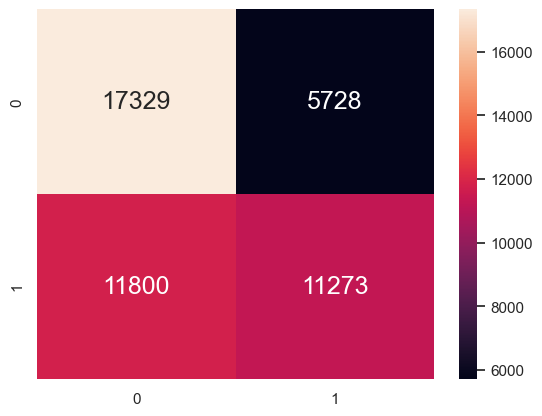

In [46]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6137582195245321

TPR Test :	 0.4784853700516351
TNR Test :	 0.748812291519256

FPR Test :	 0.25118770848074395
FNR Test :	 0.5215146299483648


<Axes: >

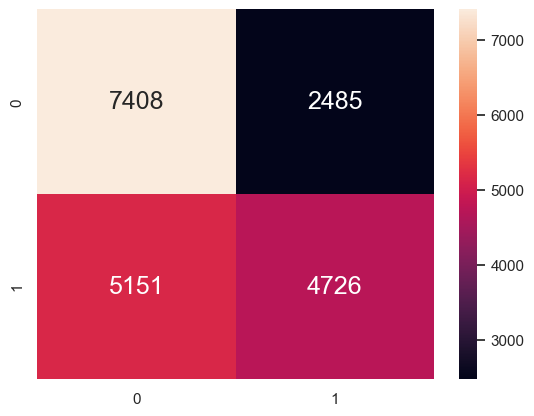

In [47]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The model performs slightly better on the testing data than the training data, which suggests that it's not overfitting excessively. However, the accuracy is relatively low, which shows that the model might not be capturing all the complexities of the data. Moreover, the TPR and TNR values for both training and testing data are close to each other, indicating a balanced performance to a certain extend in terms of correctly classifying both "Fully Paid" and "Charged-Off".

### ML Model: Random Forest Classifier (1000 Trees + 4 Depth)

x: Predictor Variable
y: Target/Response Variable ('loan_status')

1) Creating a Random Forest Classifier with 1000 trees & a maximum depth of 4 for each tree
2) Training & testing of data using 'fit' method

In [48]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.loan_status.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

Train Data
Accuracy  :	 0.6217645783654888

TPR Train :	 0.49227095093356493
TNR Train :	 0.7508658008658009

FPR Train :	 0.24913419913419912
FNR Train :	 0.5077290490664351


<Axes: >

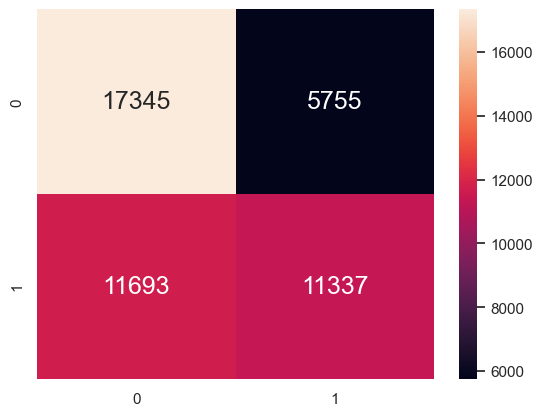

In [49]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.614820435002529

TPR Test :	 0.4878024193548387
TNR Test :	 0.7427411167512691

FPR Test :	 0.257258883248731
FNR Test :	 0.5121975806451613


<Axes: >

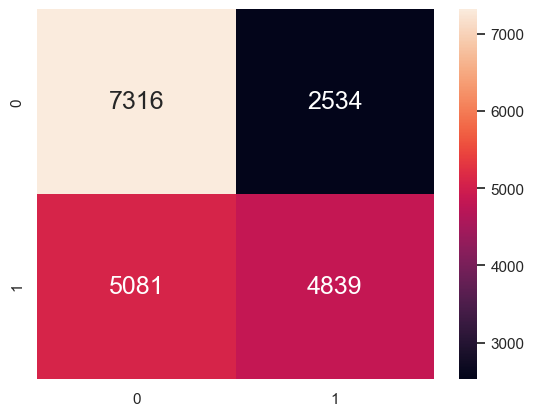

In [50]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Comparing the results with the model which has a hyperparameter of 100 trees, there isn't a significant improvement in model performance with the changes in hyperparameters (Increasing to 1000 trees). The accuracy and other metrics remain somewhat similar, suggesting that the model might not be greatly impacted by the hyperparameter adjustments made in this trial.

### ML Model: Random Forest Classifier (100 Trees + 10 Depth)

x: Predictor Variable
y: Target/Response Variable ('loan_status')

1) Creating a Random Forest Classifier with 100 trees & a maximum depth of 10 for each tree
2) Training & testing of data using 'fit' method

In [51]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.loan_status.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.70422718404509

TPR Train :	 0.6477529064723234
TNR Train :	 0.7606378369009447

FPR Train :	 0.23936216309905536
FNR Train :	 0.3522470935276766


<Axes: >

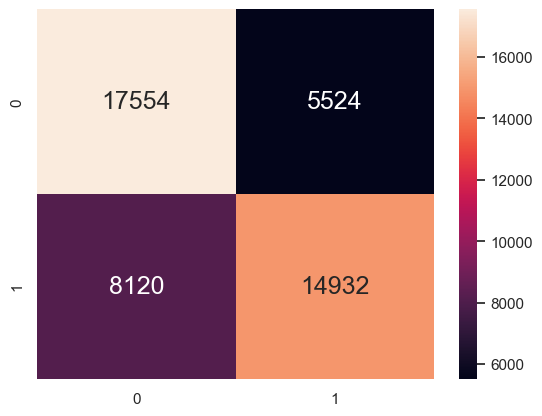

In [52]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.684117349519474

TPR Test :	 0.629824206910487
TNR Test :	 0.7385534846029174

FPR Test :	 0.26144651539708263
FNR Test :	 0.37017579308951304


<Axes: >

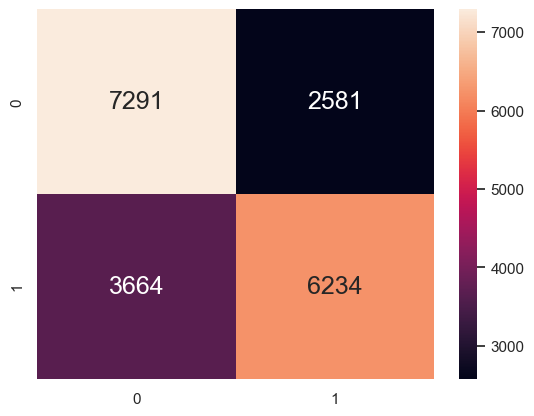

In [53]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The model's accuracy on the training data has increased significantly with the changes to hyperparameter (Increasing to 10 depth), suggesting that allowing more depth in the decision trees has led to better performance. However, the accuracy on the testing data is slightly lower than the training data, indicating a slight instance of overfitting. 

FPR and FNR are relatively low, which shows that the model is making fewer false positive and false negative predictions. However, the FNR is higher on the testing data than the training data, indicating a higher rate of false negatives in the testing set.

### ML Model: Random Forest Classifier (1000 Trees + 10 Depth)

x: Predictor Variable
y: Target/Response Variable ('loan_status')

1) Creating a Random Forest Classifier with 1000 trees & a maximum depth of 10 for each tree
2) Training & testing of data using 'fit' method

In [54]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.loan_status.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.7066984608714503

TPR Train :	 0.6403497324807517
TNR Train :	 0.7726113823948836

FPR Train :	 0.22738861760511647
FNR Train :	 0.35965026751924833


<Axes: >

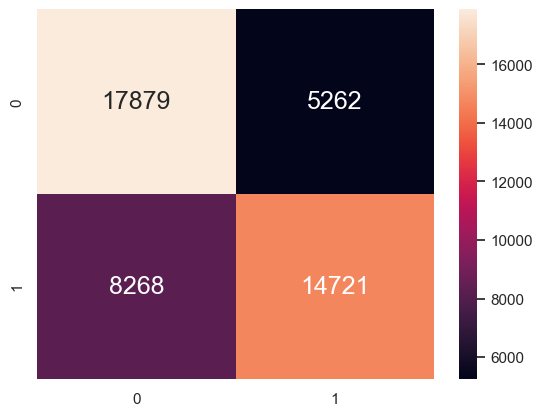

In [55]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6748103186646434

TPR Test :	 0.6025499447846602
TNR Test :	 0.7481904373534509

FPR Test :	 0.2518095626465491
FNR Test :	 0.3974500552153398


<Axes: >

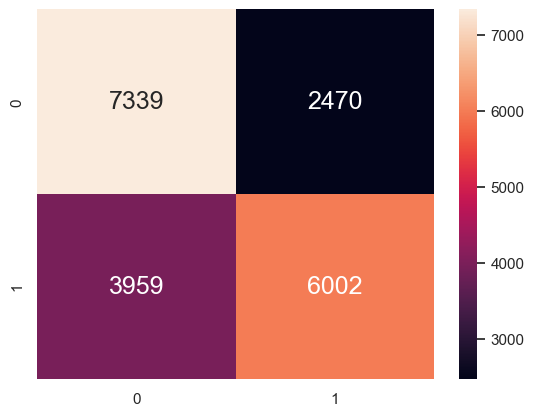

In [56]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The accuracy and other matrix readings are somewhat similar to the model with hyperparameter with 100 trees, but there is a slight improvement. This shows that increasing the number of trees has led to better capturing of patterns in the data. However, the accuracy on the testing data is slightly lower than the training data in this trial also, indicating a slight degree of overfitting. The FNR is also higher on the testing data than the training data, which shows a higher rate of false negatives in the testing set.

### Random Forest Classifier (Best Hyperparameter Tuning)

x: Predictor Variable
y: Target/Response Variable ('loan_status')

1) Searching for the best combination of 'n_estimators' (number of trees), 'max_depth' (maximum depth of the trees) and 'min_samples_split' (minimum samples required to split a node)
2) Training & testing of data using 'fit' method

In [57]:
# Define the Hyper-parameter Distribution to search on for Random Forest
param_dist = {'n_estimators': randint(100, 1001),         # number of trees between 100 and 1000
              'max_depth': randint(2, 11),                # depth of trees between 2 and 10
              'min_samples_split': randint(2, 11),        # minimum samples required to split a node between 2 and 10
              'min_samples_leaf': randint(1, 11)}         # minimum samples required in a leaf node between 1 and 10

# Create the Randomized Hyper-parameter Search object
random_search = RandomizedSearchCV(RandomForestClassifier(),  # the model family
                                   param_distributions=param_dist,  # the parameter distribution
                                   n_iter=10,            # number of parameter settings that are sampled
                                   cv=5,                 # 5-fold cross-validation
                                   scoring='accuracy',   # score to evaluate
                                   random_state=42)      # random state for reproducibility

# Train the models using Randomized Search with Cross-Validation
random_search.fit(X_train, y_train.loan_status.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(random_search.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(random_search.best_score_))


RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=975)
0.6774333405592889


In [58]:
# Extract Response and Predictors
y = pd.DataFrame(merged_data_cleaned_ohe_up['loan_status'])
X = pd.DataFrame(merged_data_cleaned_ohe_up.drop('loan_status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object with specified hyperparameters
rforest = RandomForestClassifier(n_estimators = 975,  # Number of trees
                                 max_depth = 10,       # Maximum depth of each tree
                                 min_samples_split = 4,  # Minimum number of samples required to split an internal node
                                 min_samples_leaf = 1)   # Minimum number of samples required to be at a leaf node

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.loan_status.ravel())

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=975)

#### Best Model and Score from Randomized Search Cross-Validation
Best max_depth: 10;
Best n_estimators: 975;
Best min_samples_split: 4;
Best Cross-Validation Accuracy: Approximately 67%

Train Data
Accuracy  :	 0.7055278560589638

TPR Train :	 0.6455262701577944
TNR Train :	 0.7655450524672621

FPR Train :	 0.23445494753273785
FNR Train :	 0.35447372984220565


<Axes: >

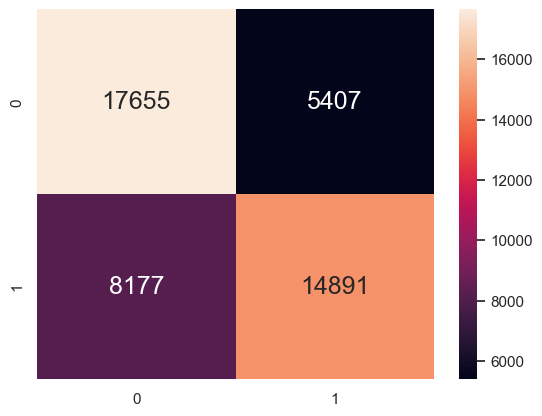

In [59]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6733940313606475

TPR Test :	 0.6093908115766039
TNR Test :	 0.7373584142394822

FPR Test :	 0.2626415857605178
FNR Test :	 0.3906091884233961


<Axes: >

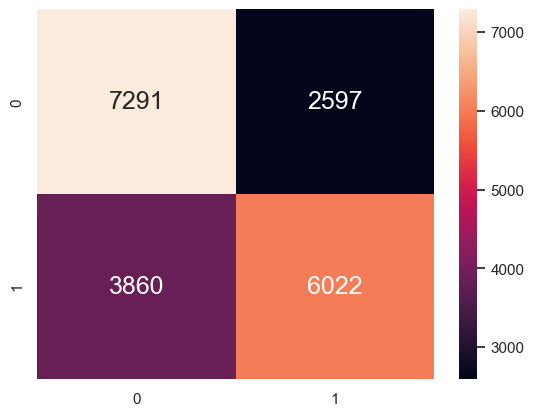

In [60]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Random Forest Classifer had a cross-validation accuracy of approximately 67% with a maximum depth of 10, 975 estimators and a min sample split of 4. The model also achieved accuracy scores between 68 - 70% on the training and testing data, respectively. The TPR and TNR indicate that the model is reasonably good at identifying both "Fully Paid" and "Charged-Off" instances, although there is a higher rate of FNR in both training and testing data, suggesting room for improvement. 

### ML Model : Logistic Regression

X: Predictor Variables;
y: Target/Response Variable ('loan_status')

1) Trainig & testing of data using 'logistic_regression.predict'
2) Calculating the classification accuracy and confusion matrix

Train Data
Accuracy  :	 0.5188163884673748

TPR Train :	 0.10412692907924398
TNR Train :	 0.9336137368831845

FPR Train :	 0.06638626311681554
FNR Train :	 0.8958730709207561


<Axes: >

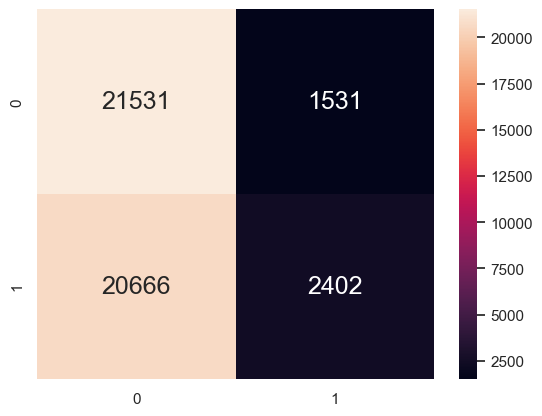

In [61]:
logistic_regression = LogisticRegression()

# Fit Logistic Regression on Train Data
logistic_regression.fit(X_train, y_train.loan_status.ravel())

# Predict the Response corresponding to Predictors for Training Data
y_train_pred = logistic_regression.predict(X_train)

# Print the Classification Accuracy for Training Data
print("Train Data")
print("Accuracy  :\t", logistic_regression.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Training Data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix for Training Data
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.518361153262519

TPR Test :	 0.10109289617486339
TNR Test :	 0.935376213592233

FPR Test :	 0.06462378640776699
FNR Test :	 0.8989071038251366


<Axes: >

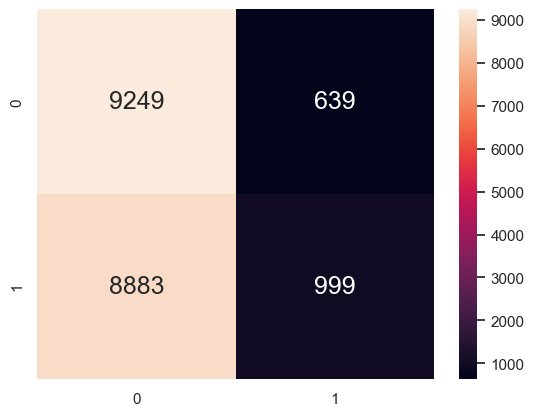

In [62]:
# Predict the Response corresponding to Predictors for Test Data
y_test_pred = logistic_regression.predict(X_test)

# Print the Classification Accuracy for Test Data
print("Test Data")
print("Accuracy  :\t", logistic_regression.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix for Test Data
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix for Test Data
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


It seems that the model, logistic regression, generally does not perform well on the testing data than the training data. This indicates some level of overfitting as the testing data readings are lower than the training data. However, the differences are not significant, suggesting that the model performs reasonably well. The TPR and TNR are fairly balanced, indicating that the model is making reasonably good predictions at identifying both "Fully Paid" and "Charged-Off" instances.